<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/DescriptiveStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Load seasonal data
df1 = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df1.index.freq = 'MS'

In [0]:
# Load non-seasonal data
df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates = True)
df2.index.freq = 'D'

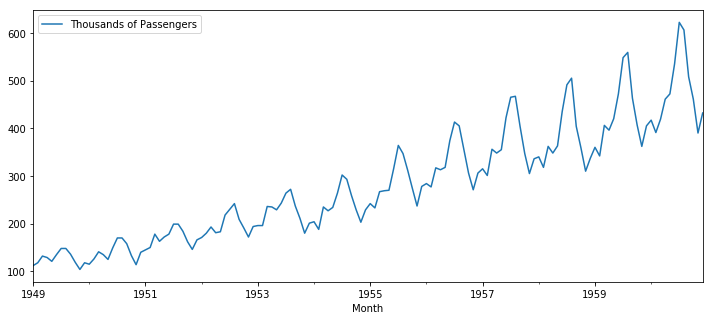

In [11]:
df1.plot(figsize = (12,5));

The graph clearly shows that the data is stationary. We can use use the Dicker-Fuller test to test the null hypothesis and determine whether the data is stationary or not.
We can also put all the code below in a function to get a more detailed explanation of the statistics.

In [0]:
from statsmodels.tsa.stattools import adfuller 

In [16]:
# pass the data to adfuller
adfuller(df1['Thousands of Passengers'])

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [0]:
dftest = adfuller(df1['Thousands of Passengers'])
# make a series to retrieve the info
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Number of Observations' ])

In [18]:
dfout

ADF Test Statistic            0.815369
p-value                       0.991880
# Lags Used                  13.000000
# Number of Observations    130.000000
dtype: float64

In [0]:
for key,val in dftest[4].items():
  dfout[f'critical value ({key})'] = val

In [21]:
dfout

ADF Test Statistic            0.815369
p-value                       0.991880
# Lags Used                  13.000000
# Number of Observations    130.000000
critical value (1%)          -3.481682
critical value (5%)          -2.884042
critical value (10%)         -2.578770
dtype: float64

In [0]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [23]:
# call adf_test function on df1

adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


We can not run the function on df2 and see if that data is stationary.

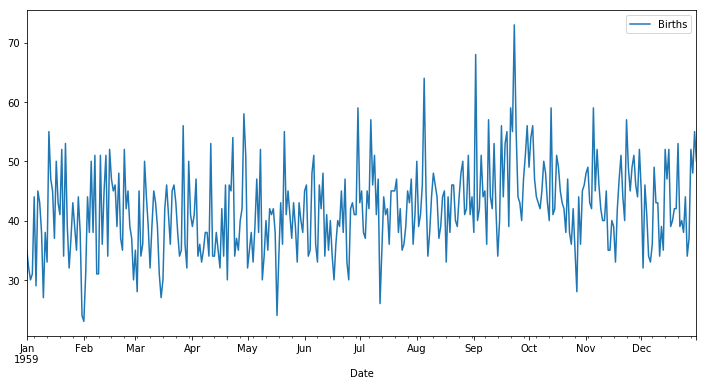

In [24]:
df2.plot(figsize=(12,6))

In [25]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
